# EXCHANGE RATE DYNAMICS: THE RELATIONSHIP BETWEEN DANISH INFLATION AND RELATIVE EXCHANGE RATES

## Introduction

### Research question

The research question we wish to answer in this data project is: *"How does Danish inflation affect the exchange rates Euro and the US Dollar?"*

## Data analysis

To start with, we import the required modules, classes, and API to answer the research question.

In [25]:
# 1. Import the classic Python modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import ipywidgets as widgets 
from ipywidgets import interact, widgets 

# 2. Autoreload the modules, when the code is run
%load_ext autoreload
%autoreload 2

# 3. Import the user written modules
import dataproject

# 4. Setup the API
# a. If not downloaded before, run this code to download the API for Denmarks Statistics: %pip install git+https://github.com/alemartinello/dstapi

# b. Import the DstApi-class from the API
from dstapi import DstApi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read and clean data

#### The first dataset: Three exchange rates (EUR, USD, and CNY)

The first dataset is on the yearly annual relative rates of the Euro (EUR), the US Dollar (USD), and the Chinese Yuan Renminbi (CNY). 
We fetch the first dataset from Denmark Statistics using an API provided to us by alemartinello on GitHub. 
After that we show the metadata to make sure we have fetched the correct data.

Summary of what we do to clean the first dataset:
1. Access the dataset
2. Show a summary of the metadata
3. Table with variable names
4. Get template of the data
5. Access the template
6. Select the relevant data
7. Rename the columns 
8. Change the datatypes

In [26]:
# 1. Access the dataset using the API and assign it to "dnvala"
dnvala = DstApi('DNVALA') # DNVALA is the name of the dataset on Denmark Statistics  

# 2. Show a summary of the metadata
# a. Store the tablesummary in the variable "tabsum" 
tabsum = dnvala.tablesummary(language='en') # We set the language to english, as we want the metadata being in english

# b. Display the summary of the metadata
display(tabsum)

Table DNVALA: Yearly exchange rates by currency, type, methodology and time
Last update: 2024-04-11T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VALUTA,57,EUR,Euro (Jan. 1999-),Z60,"Other currencies than EUR, USD, GBP, SEK, NOK ...",False
1,KURTYP,12,KBH,Exchange rates (DKK per 100 units of foreign c...,EFB,Important currencies contribution to changes i...,False
2,OPGOER,4,A,Annual average,Y,Annual growth rate,False
3,Tid,54,1970,1970,2023,2023,True


In [27]:
# 3. Print out a table containing the variable names followed by their units or values 
for variable in tabsum['variable name']: # We interate for every variable (column) in the tabsum-variable
    # a. For every variable in tabsum, we print out the variable with a colon
    print(variable+':')
    # b. Display the new summary 
    display(dnvala.variable_levels(variable, language='en')) # We set the language of the text to english 

VALUTA:


,id,text
0,EUR,Euro (Jan. 1999-)
1,USD,US Dollars (Jan. 1979-)
2,GBP,UK Pounds Sterling (Jan. 1980-)
3,SEK,Swedish Kronor (Jan. 1981-)
4,NOK,Norwegian Kroner (Jan. 1981-)
5,CHF,Swiss Francs (Jan. 1981-)
6,CAD,Canadian Dollars (Jan. 1981-)
7,JPY,Japanese Yen (Jan. 1981-)
8,AUD,Australian Dollars (Oct. 1991-)
9,NZD,New Zealand Dollars (Oct. 1991-)


KURTYP:


,id,text
0,KBH,Exchange rates (DKK per 100 units of foreign c...
1,TT3,"Forward premium, 3 months (DKK per 100 units o..."
2,TT6,"Forward premium, 6 months (DKK per 100 units o..."
3,INX,"Index (only nominal effective krone rate), ind..."
4,REK,Real effective krone rate based on consumer pr...
5,DKI,"Consumer prices in Denmark, index (1980=100)"
6,Z9I,"Weighted foreign consumer price index, index (..."
7,EUI,"Consumer price index for the euro area, index ..."
8,RET,Real effective krone rate based on hourly earn...
9,LOI,"Hourly earnings in manufacturing in Denmark, s..."


OPGOER:


,id,text
0,A,Annual average
1,E,End-year
2,B,Calculated
3,Y,Annual growth rate


Tid:


,id,text
0,1970,1970
1,1971,1971
2,1972,1972
3,1973,1973
4,1974,1974
5,1975,1975
6,1976,1976
7,1977,1977
8,1978,1978
9,1979,1979


We now want to select the data we are interested in analyzing by getting a template for the data.

In [28]:
# 4. Want to get a template of the variables, so we can choose the data we want to look at
params = dnvala._define_base_params(language='en')
params

{'table': 'dnvala',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VALUTA', 'values': ['*']},
  {'code': 'KURTYP', 'values': ['*']},
  {'code': 'OPGOER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [29]:
# 5. Now want to select the data of interest
variables = params['variables'] # Returns a view that we can edit

# a. Select the three exchange rates (EUR, USD, CNY)
variables[0]['values'] = ['EUR', 'USD', 'CNY']

# b. Select the exchange rate per 100 DKK kroner
variables[1]['values'] =['KBH']

# c. Select the annual averages
variables[2]['values'] = ['A']

# d. Select data for the period 2006-2023
variables[3]['values'] = ['>2005<=2023']

# e. Show the selected data
params

{'table': 'dnvala',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VALUTA', 'values': ['EUR', 'USD', 'CNY']},
  {'code': 'KURTYP', 'values': ['KBH']},
  {'code': 'OPGOER', 'values': ['A']},
  {'code': 'Tid', 'values': ['>2005<=2023']}]}

In [30]:
# Store the selected data in a variable
va_api = dnvala.get_data(params=params)

# 6. Rename the columns
va_api.rename(columns = {'VALUTA': 'Exchange rate', 'KURTYP': 'Currency', 'OPGOER': 'Unit', 'TID': 'Year','INDHOLD': 'Value'}, inplace=True)

# 7. Convert the datatypes of the variables
# a. Convert 'Year' to an integer, otherwise it will be shown with decimals in the graph
va_api['Year'] = va_api['Year'].astype(str)

# b. Convert 'Value' to a float data type
va_api['Value'] = va_api['Value'].astype(float)

# c. Store the datatypes in a variable
data_types = va_api.dtypes

# d. Print out the data types
print(data_types)

# e. Visualizing first 6 observations in the dataset
va_api.head(6)

Exchange rate     object
Currency          object
Unit              object
Year              object
Value            float64
dtype: object


,Exchange rate,Currency,Unit,Year,Value
0,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,78.3896
1,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,744.6251
2,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,535.5082
3,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,544.5551
4,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,71.5582
5,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,745.0551


## The second dataset: Danish Inflation (Consumer Price Index)

The second dataset is also from Denmark Statistics, more precisely the dataset PRIS8. However, this data is fetched manually by setting up a csv-file called Inflation.csv. This is to show that we can use both methods of fetching data.

Summary of what we do to clean the second dataset:
1. Store the csv-file in a variable
2. Display the first five observations
3. Create a DataFrame from the CSV
4. Check if there are any non-null observations in the DataFrame
5. Change column name
6. Change datatypes

In [31]:
# 1. Store the csv-file in a variable
CPI = 'Inflation.csv'

# 2. Display the first five observations of the dataset, to make sure it is correct
pd.read_csv(CPI).head(5)

,Year,Value
0,2006,1.9
1,2007,1.7
2,2008,3.4
3,2009,1.3
4,2010,2.3


In [32]:
# 3. Make a DataFrame from the csv-file
CPI_df = pd.read_csv(CPI)

# 4. Making sure that there are no non-null observations in the DataFrame
CPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Value   18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 420.0 bytes


In [33]:
# 5. Check the column names in the DataFrame
print(CPI_df.columns)

# a. Use strip() to remove leading whitespace from column names
CPI_df.columns = CPI_df.columns.str.strip()

# b. Rename the 'Value' column to 'Percent'
CPI_df.rename(columns={'Value': 'Inflation'}, inplace=True)

# c. Check the DataFrame after renaming the "Value"-column
print(CPI_df.head(5))

Index(['Year', 'Value'], dtype='object')
   Year  Inflation
0  2006        1.9
1  2007        1.7
2  2008        3.4
3  2009        1.3
4  2010        2.3


In [34]:
# 6. Print out the data types for the columns of the dataframe, CPI_df
print(CPI_df.dtypes)

Year           int64
Inflation    float64
dtype: object


So, we have that year is declared as an integer, whereas the inflation is a float. The datatype for inflation looks good, as the data for inflation contains decimals. However, the "Year" column should not be declared as an integer, as this will make the Year-labels on our x-axis in the static plot incorrect, as the years will contain decimals. Therefore, we need to change the data type for the years to be strings, and the years will then be whole numbers.

In [35]:
# a. Change the datatype for the 'Year'-column to a string
CPI_df['Year'] = CPI_df['Year'].astype(str)

# b. Print out the datatypes 
print(CPI_df.dtypes)

Year          object
Inflation    float64
dtype: object


The two datasets have now been fully fetched, structured, and cleaned. Hence, we are ready to explore the two datasets. 

### Merge data sets

In [36]:
# 1. Check the column names for the two datasets
print(va_api.columns)
print(va_api.dtypes)

# 2. Check the data types for the two datasets
print(CPI_df.columns)
print(CPI_df.dtypes)

# 3. Merge the two datasets assuming that the column names are case-sensitive and that the data types are compatible
# a. Merge on 'Value' in the va_api dataset and 'Percent' in the CPI_df dataset
outer = pd.merge(va_api, CPI_df, on= 'Year', how='outer')

# b. Display the first 5 observations in the merged dataset
outer.head(5)

Index(['Exchange rate', 'Currency', 'Unit', 'Year', 'Value'], dtype='object')
Exchange rate     object
Currency          object
Unit              object
Year              object
Value            float64
dtype: object
Index(['Year', 'Inflation'], dtype='object')
Year          object
Inflation    float64
dtype: object


,Exchange rate,Currency,Unit,Year,Value,Inflation
0,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,78.3896,1.3
1,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,744.6251,1.3
2,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2009,535.5082,1.3
3,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,544.5551,1.7
4,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,71.5582,1.7


#### Descriptive statistics of the merged data set

We have merged the two data sets, and we can now analyze the relationship between the exchange rates and the Danish Inflation. First, we look at the descriptive statistics of the data.

In [37]:
# 1. Show a summary statistics by using the describe-function
outer.describe().round(2)

,Value,Inflation
count,54.00,54.00
mean,481.73,1.89
std,286.92,1.72
min,71.56,0.30
25%,97.57,0.80
50%,611.94,1.50
75%,744.49,2.40
max,746.60,7.70


The table above shows that a mean of 481.73 for value of exchange rate per 100 danish krone compared to the 50% percentile (median) which is alot higher at an value of 611.94.


The mean of inflation is 1.89 percent, which is close to the ECB's target inflation of 2 percent. The minimum inflation is 0.30 percent, whereas the maximum shows an inflation rate of 7.70 percent.

### Analysis

In the analysis, we want to examine the three exchange rate and compare it to the danish inflation rate in the same time period. 

We make a **Static plot** for the three exchange rates:


The static plot for the three exchange rates can be seen below:


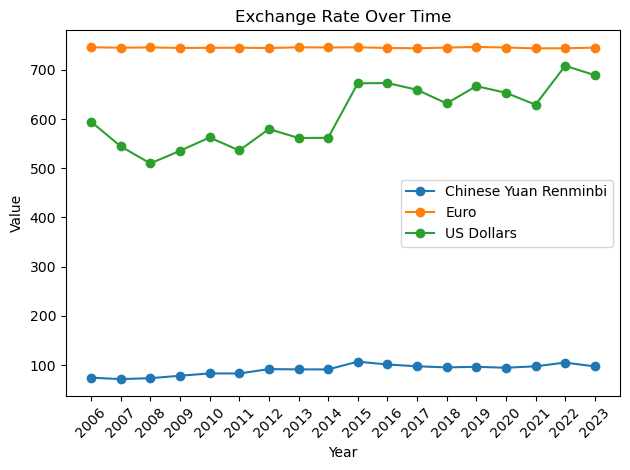

In [38]:
# 1. Sort the data by 'Year'
va_api_sorted = va_api.sort_values('Year')

# 2. Group the data by 'Exchange rate'
grouped_data = va_api_sorted.groupby('Exchange rate')

# 3. Create a figure and axis
fig, ax = plt.subplots()

# 4. Plot each group (exchange rate) as a separate line with markers
for name, group in grouped_data:
    legend_label = name.split('(')[0].strip()  # Extract the part before the parentheses and remove leading/trailing spaces
    ax.plot(group['Year'], group['Value'], label=legend_label, marker='o', linestyle='-')

# 5. Set the labels and the title for the static plot
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Exchange Rate Over Time')

# 6. Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# 7. Add a legend to the static plot

ax.legend()

# 8. Show the static plot
print("The static plot for the three exchange rates can be seen below:")
plt.tight_layout() # This adjusts the layout to prevent labels from being overlapped
plt.show() # This shows the static plot

##### Descriptive analysis of the first static plot

The static plot for the three exchange rates makes it easy to see the differences in levels for the three exchange rates. We see that the highest exchange rate relative to Danish kroners is the Euro with around 740, which is also the most stable. This is because of the central parity currency with the Danish krone being fixed to the Euro. The second highest is the USD, which fluctuates a lot in the period, ranging from 500 to 700. At last, the CNY is the lowest with around 90-100 in the period. 

However, it is quite hard to see the yearly developments in the individual exchange rates. Therefore, it would be interesting to create an interactive plot, where we can change the exchange rate shown in the plot. This would highlight the year to year changes in each of the exchange rates.

**Interactive plot for the three exchange rates**:

In [39]:
# 1. Define a function to get the plot 
def plot_func(exchange_rate):
    # a. Filter the DataFrame for the selected exchange rate
    filtered_data = va_api[va_api['Exchange rate'] == exchange_rate]
    filtered_data_sorted = filtered_data.sort_values('Year')  # We sort the data by year
    # b. Plot the filtered and sorted data
    plt.figure(figsize=(15, 5)) # We adjust the size
    plt.plot(filtered_data_sorted['Year'], filtered_data_sorted['Value'], '-o') # Filters the data
    plt.xlabel('Year') # Adds a label on the x-axis
    plt.ylabel('Value') # Adds a label on the y-axis
    plt.title(f'Exchange Rate Over Time ({exchange_rate})')
    plt.grid(True) # Adds grids to the plot
    plt.show() # Shows the plot

# 2. Create the widget for selecting the specific exchange rates (EUR, USD, and CNY)
exchange_rate_widget = widgets.Dropdown(
    # a. Create the options (EUR, USD, and CNY) in the dropdown menu
    options=va_api['Exchange rate'].unique(),
    # b. Add a description to the dropdown menu, where we use FX Rate as a abbreviation for "Foreign Exchange Rate". This is because Exchange Rate is too long a word  
    description='FX Rate:' # FX = Foreign Exchange
)

# 3. Show the interactive plot
# a. Include a print statement, which describes where the plot can be found over the interactive plot
print("The interactive plot of the three exchange rates can be seen below:")

# b. Plot the interactive plot using the widget
interact(plot_func, exchange_rate=exchange_rate_widget) 

The interactive plot of the three exchange rates can be seen below:


interactive(children=(Dropdown(description='FX Rate:', options=('Chinese Yuan Renminbi (Apr. 2005-)', 'Euro  (…

<function __main__.plot_func(exchange_rate)>

When the option in the dropdown menu (widget) is chosen then the specific exchange rate will be shown in the plot. Also the y-axis is scaled differently, which makes it easier to see the yearly developments in the exchange rates. 

It is now possible to see the yearly developments in the Euro. We see that the Euro fluctuates a lot in the period around a constant mean (it is mean reverting) of around 746 DKK. This is because the central parity rate is 7.46 DKK. 

##### Static plot for the Danish inflation

To see the yearly developments of Danish inflation, we make a static plot.

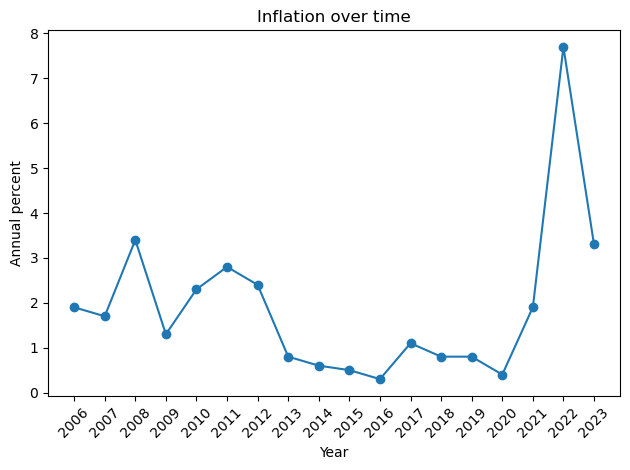

In [40]:
# 1. Create a figure and the two axes
fig, ax = plt.subplots()

# 2. Set the year-column to be on the x-axis, and the inflation-column to be on the y-axis.
ax.plot(CPI_df['Year'], CPI_df['Inflation'], marker='o', linestyle='-')

# 3. Set the labels for the two axes and the title for the static plot
ax.set_xlabel('Year')
ax.set_ylabel('Annual percent')
ax.set_title('Inflation over time')

# 4. Rotate the x-axis tick labels by 45 degrees, so it becomes readable
plt.xticks(rotation=45)

# 5. Show the static plot
# a. Adjust the layout to prevent labels from overlapping, so they become readable
plt.tight_layout()

# b. Print out the static plot
plt.show()

##### Descriptive analysis of the second static plot

In the static plot above we see the raw data for the Danish annual inflation rate for the period 2006-2023.

Initally the Danish inflation increases and exceedes the ECB's inflation target for the medium run, which is about 2 percent. This happends in the first year of the Global Financial Crisis in 2008, where there was demand-pull inflation of the Danish and the global economy. This overheating was caused by a high consumer demand and thereby a high employment rate, which leads to increased inflation, as derived from the Phillips Curve. 

In the next recession year, 2009, the consumers reduced their demand, and the employment rate was decreasing, which led to the decrease in Danish inflation.

 In the years 2012-2016, the inflation was decreasing because of economic uncertainty in Europe resulting from the Eurozone debt crisis.
 
 After 2016, the Danish inflation began increasing again, as many of the major economies had recovered from the Global Financial Crisis. 
 
 As a consequence of covid in 2020 the inflation rate increased to nearly the same level as in 2006.

 In 2022, the inflation increased to nearly 8 percent, because of the international sanctions against Russia after the Russian Invasion of Ukraine. This affected the available supply of commodities leading to cost-push inflation. This spike only lasted one year, as the central banks (for example the FED and the ECB) increased the interest rates. 

#### Plot for the merged data set of the exchange rates and Danish inflation

Finally, we plot the merged data set

The plot for the exchange rates and annual Danish inflation can be seen below:


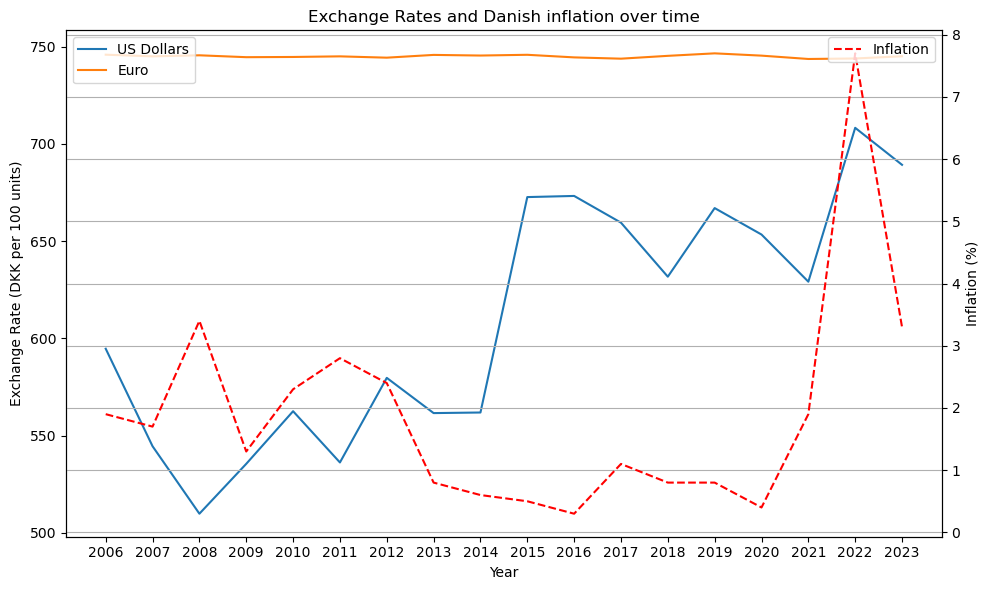

In [41]:
# 1. Sort by year
outer = outer.sort_values('Year')

# 2. Filter the data
# a. Filter the data in the exchange rate for the US Dollars
usd_data = outer[outer['Exchange rate'].str.contains('US Dollars')]

# b. Filter data in Exchange rate for the Chinese Yuan Renminbi
# cny_data = outer[outer['Exchange rate'].str.contains('Chinese Yuan')] 
# c. The Chinese Yuan Renminbi is excluded in the figure to better compare the exchange rates and the Danish inflation

# d. Filter the data in exchange rate for the Euro
eur_data = outer[outer['Exchange rate'].str.contains('Euro')]

# 3. Create the figure and the two axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# 3. Plot each exchange rate (USD and EUR) on the first y-axis
ax1.plot(usd_data['Year'], usd_data['Value'], label='US Dollars')

# ax1.plot(cny_data['Year'], cny_data['Value'], label='Chinese Yuan')
ax1.plot(eur_data['Year'], eur_data['Value'], label='Euro')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Exchange Rate (DKK per 100 units)')
ax1.set_title('Exchange Rates and Danish inflation over time')
ax1.legend(loc='upper left') # Creates a legend

# 4. Create a second y-axis for the annual Danish inflation
ax2 = ax1.twinx()
# Plot the annual Danish inflation using eur_data as the inflation rate is the same for all exchange rate
ax2.plot(eur_data['Year'], eur_data['Inflation'], linestyle='--', color='red', label='Inflation')
ax2.set_ylabel('Inflation (%)')
ax2.legend(loc='upper right') # Creates a legend

# 5. Show the merged plot
# a. Print out a statement that tells the users, where the plot is located
print("The plot for the exchange rates and annual Danish inflation can be seen below:")
plt.grid(True) # Adds grids to the plot
plt.tight_layout() # Prevents the labels from overlapping
plt.show() # Displays the plot

In the plot above we can see the annual rates for USD and EUR and the Danish inflation in percent.

Initally the Danish inflation increases and exceedes the ECB's inflation target for the medium run, which is about 2 percent. This happends in the first year of the Global Financial Crisis in 2008, where there was demand-pull inflation of the Danish and the global economy.
The same year the USD decreased to around 520, which could be due to the FED lowering the interest rates more aggressively than the ECB. This overheating was caused by a high consumer demand and thereby a high employment rate, which leads to increased inflation. 

In the next recession year, 2009, the Danish consumers reduced their demand, and the Danish employment rate was decreasing, which led to the decrease in Danish inflation. The USD relative to Danish Kroners increased the same year, which could be due to more investors investing in American assets and currency, since it is a very safe asset.

In the years 2012-2016, the Danish inflation was decreasing possibly because of economic uncertainty in Europe resulting from the Eurozone debt crisis. In the same period, the USD relative to DKK increased. This could be due to the FED setting higher interest rates relative to the Danish Nationalbank, which had low interest rates to keep being pegged to the Euro. 
After 2016, the Danish inflation began increasing again, as many of the European economies had recovered from the Global Financial Crisis. 

In 2022, the Danish inflation increased to nearly 8 percent, because of the international sanctions against Russia after the Russian Invasion of Ukraine. This affected the available supply of commodities leading to cost-push inflation. This spike only lasted one year, as the central banks (for example the FED and the ECB) increased the interest rates. Since the FED lowered the interest rate more than the ECB to fight inflation, we see that the USD relative to DKK also fell in 2023.

### Conclusion

Overall we find no correlation between exchange rate and the Danish inflation during the period 2006-2023. 
The analysis might have shown a different result if we used the Danish exchange rate. 

We do find that the Danish inflation is mostly stabil, but when unexpected shock such as the Global Financial Crisis and the Invasion of Ukraine, the inflation rate will fluctuate alot. 
The exchange rate does not seem to be affected by unexpected shocks like inflation did. 